In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix

## **Data Diabetes**

In [2]:
# memuat dataset dari file CSV
df = pd.read_csv('C:/Users/LENOVO/OneDrive/Desktop/SEMINAR HASIL/Code TA/Data After Processing/Data Diabetes.csv')

# menentukan kelas minoritas dan kelas mayoritas
target_column = 'Outcome'
class_counts = df[target_column].value_counts()

if class_counts[0] > class_counts[1]:
    minority_class = 1
    majority_class = 0
else:
    minority_class = 0
    majority_class = 1

print(f'Kelas minoritas: {minority_class}')
print(f'Kelas mayoritas: {majority_class}')


Kelas minoritas: 1
Kelas mayoritas: 0


In [82]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1


In [83]:
df_fil = df.loc[df["Outcome"] == 0]
df_fil

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
5,0.294118,0.582915,0.606557,0.000000,0.000000,0.381520,0.052519,0.150000,0
7,0.588235,0.577889,0.000000,0.000000,0.000000,0.526080,0.023911,0.133333,0
10,0.235294,0.552764,0.754098,0.000000,0.000000,0.560358,0.048249,0.150000,0
...,...,...,...,...,...,...,...,...,...
762,0.529412,0.447236,0.508197,0.000000,0.000000,0.335320,0.027327,0.200000,0
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0


In [84]:
df_fil = df.loc[df["Outcome"] == 1]
df_fil

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1
6,0.176471,0.391960,0.409836,0.323232,0.104019,0.461997,0.072588,0.083333,1
8,0.117647,0.989950,0.573770,0.454545,0.641844,0.454545,0.034159,0.533333,1
...,...,...,...,...,...,...,...,...,...
755,0.058824,0.643216,0.721311,0.393939,0.130024,0.543964,0.418019,0.266667,1
757,0.000000,0.618090,0.590164,0.000000,0.000000,0.540984,0.076857,0.516667,1
759,0.352941,0.954774,0.754098,0.000000,0.000000,0.529061,0.085397,0.750000,1
761,0.529412,0.854271,0.606557,0.313131,0.000000,0.655738,0.138770,0.366667,1


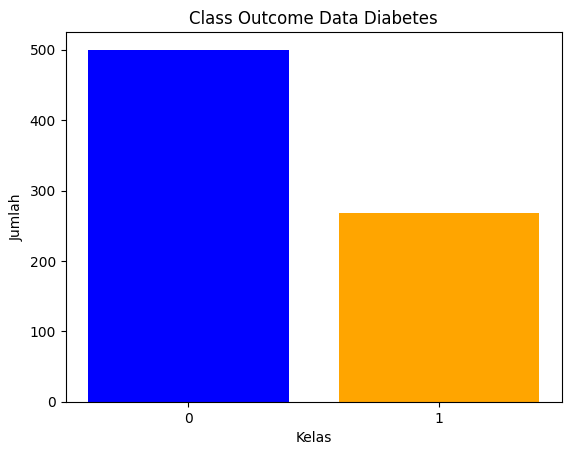

In [85]:
plt.bar(class_counts.index, class_counts.values,color=['blue','orange'])
plt.xticks(class_counts.index)
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.title('Class Outcome Data Diabetes')
plt.show()

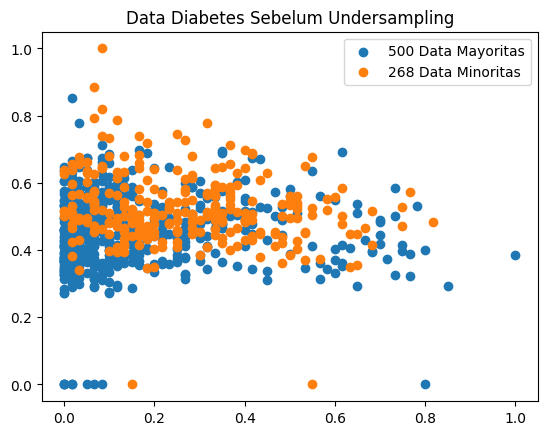

In [3]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']
plt.scatter(X.loc[y == 0, "Age"], X.loc[y == 0, "BMI"], label="500 Data Mayoritas")
plt.scatter(X.loc[y == 1, "Age"], X.loc[y == 1, "BMI"], label="268 Data Minoritas")
plt.title("Data Diabetes Sebelum Undersampling")
plt.legend()
plt.show()

In [4]:
import timeit
start = timeit.default_timer()
sum=0
n=1000000
for i in range (n+1):
    sum+=i

from sklearn.utils import resample
df_majority = df[df['Outcome']==0]
df_minority = df[df['Outcome']==1]
df_majority_undersampled = resample(df_majority, replace=True, n_samples=len(df_minority), random_state=42)
df_undersampled = pd.concat([df_minority, df_majority_undersampled])
#df_undersampled.to_csv("RUSs Data Diabetes.csv", index=False)

#Waktu
stop=timeit.default_timer()
lama=stop-start
print("Waktu Eksekusi RUS: ",lama, "detik")

Waktu Eksekusi RUS:  0.1816676999997071 detik


In [5]:
df_undersampled['Outcome'].value_counts()

1    268
0    268
Name: Outcome, dtype: int64

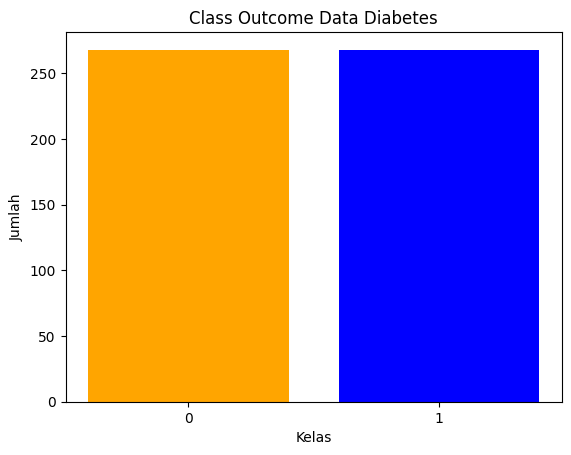

In [89]:
plt.bar(df_undersampled['Outcome'].value_counts().index, df_undersampled['Outcome'].value_counts().values,color=['blue','orange'])
plt.xticks(df_undersampled['Outcome'].value_counts().index)
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.title('Class Outcome Data Diabetes')
plt.show()

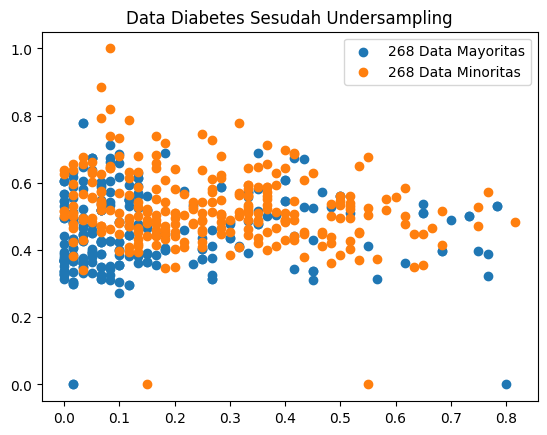

In [6]:
X = df_undersampled.drop('Outcome', axis=1)
y = df_undersampled['Outcome']
plt.scatter(X.loc[y == 0, "Age"], X.loc[y == 0, "BMI"], label="268 Data Mayoritas")
plt.scatter(X.loc[y == 1, "Age"], X.loc[y == 1, "BMI"], label="268 Data Minoritas")
plt.title("Data Diabetes Sesudah Undersampling")
plt.legend()
plt.show()

In [91]:
df_undersampled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1
6,0.176471,0.391960,0.409836,0.323232,0.104019,0.461997,0.072588,0.083333,1
8,0.117647,0.989950,0.573770,0.454545,0.641844,0.454545,0.034159,0.533333,1
...,...,...,...,...,...,...,...,...,...
499,0.352941,0.773869,0.606557,0.323232,0.228132,0.436662,0.324936,0.300000,0
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0
672,0.588235,0.341709,0.868852,0.232323,0.057920,0.529061,0.088386,0.433333,0
85,0.117647,0.552764,0.606557,0.292929,0.147754,0.482861,0.264731,0.100000,0


In [92]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score,confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.tree import DecisionTreeClassifier
# Decision Tree
Tree_classifier = DecisionTreeClassifier()

# Data Training
Tree_classifier.fit(X_train, y_train)
# Prediksi
y_hat = Tree_classifier.predict(X_test) #y_hat = prediksi

In [93]:
df_train = pd.DataFrame(X_train, columns=df.columns[:-1])
df_train["Outcome"] = y_train
df_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
164,0.000000,0.658291,0.721311,0.000000,0.000000,0.470939,0.283945,0.183333,1
663,0.529412,0.728643,0.655738,0.464646,0.153664,0.564829,0.238685,0.316667,1
48,0.411765,0.517588,0.540984,0.323232,0.000000,0.582712,0.113578,0.166667,1
26,0.411765,0.738693,0.622951,0.000000,0.000000,0.587183,0.076430,0.366667,1
606,0.058824,0.909548,0.639344,0.424242,0.346336,0.596125,0.503843,0.016667,1
...,...,...,...,...,...,...,...,...,...
195,0.294118,0.793970,0.688525,0.414141,0.248227,0.587183,0.135354,0.133333,1
283,0.411765,0.809045,0.704918,0.000000,0.000000,0.453055,0.037148,0.433333,1
537,0.000000,0.286432,0.491803,0.000000,0.000000,0.323398,0.280529,0.766667,0
725,0.235294,0.562814,0.639344,0.404040,0.000000,0.587183,0.067464,0.283333,0


In [94]:
df_test = pd.DataFrame(X_test, columns=df.columns[:-1])
df_test["Outcome"] = y_test
df_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
306,0.588235,0.809045,0.557377,0.232323,0.156028,0.380030,0.105892,0.433333,1
339,0.411765,0.894472,0.688525,0.000000,0.000000,0.594635,0.108027,0.333333,1
404,0.294118,0.844221,0.524590,0.000000,0.000000,0.490313,0.024338,0.333333,1
709,0.117647,0.467337,0.524590,0.323232,0.189125,0.566319,0.254483,0.033333,1
220,0.000000,0.889447,0.491803,0.292929,0.565012,0.515648,0.424424,0.000000,1
...,...,...,...,...,...,...,...,...,...
72,0.764706,0.633166,0.737705,0.000000,0.000000,0.646796,0.215628,0.350000,1
298,0.823529,0.502513,0.639344,0.252525,0.217494,0.545455,0.142613,0.416667,1
536,0.000000,0.527638,0.737705,0.000000,0.000000,0.441133,0.050811,0.416667,0
543,0.235294,0.422111,0.737705,0.232323,0.066194,0.588674,0.034586,0.066667,0


In [95]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74        85
           1       0.70      0.75      0.73        76

    accuracy                           0.73       161
   macro avg       0.73      0.73      0.73       161
weighted avg       0.73      0.73      0.73       161



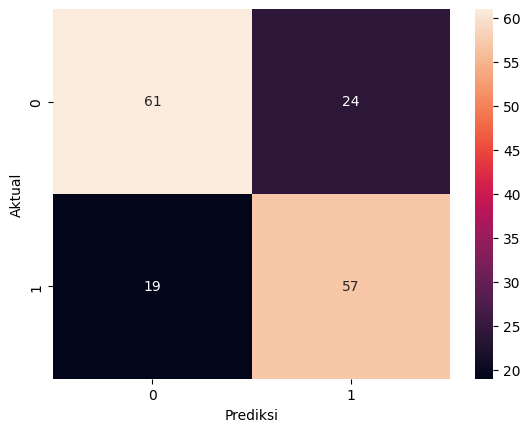

In [96]:
# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_hat)

# Plotting confusion matrix
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

In [97]:
# Hitung akurasi
akurasi = accuracy_score(y_test, y_hat)
print("Akurasi:", akurasi)

# Hitung presisi
presisi = precision_score(y_test, y_hat)
print("Presisi:", presisi)

# Hitung recall
recall = recall_score(y_test, y_hat)
print("Recall:", recall)

# Hitung f-measure
f_measure = f1_score(y_test, y_hat)
print("F-measure:", f_measure)

Akurasi: 0.7329192546583851
Presisi: 0.7037037037037037
Recall: 0.75
F-measure: 0.7261146496815287


## **Data Bank Turnover**

In [7]:
# memuat dataset dari file CSV
df = pd.read_csv('C:/Users/LENOVO/OneDrive/Desktop/SEMINAR HASIL/Code TA/Data After Processing/Data Bank Turnover.csv')

# menentukan kelas minoritas dan kelas mayoritas
target_column = 'Exited'
class_counts = df[target_column].value_counts()

if class_counts[0] > class_counts[1]:
    minority_class = 1
    majority_class = 0
else:
    minority_class = 0
    majority_class = 1

print(f'Kelas minoritas: {minority_class}')
print(f'Kelas mayoritas: {majority_class}')


Kelas minoritas: 1
Kelas mayoritas: 0


In [99]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0
1,0.516,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1
2,0.304,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0
3,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0
4,1.000,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,1,0.283784,0.5,0.000000,0.333333,1,0,0.481341,0,1,0,0
9996,0.332,1,0.229730,1.0,0.228657,0.000000,1,1,0.508490,0,1,0,0
9997,0.718,0,0.243243,0.7,0.000000,0.000000,0,1,0.210390,1,1,0,0
9998,0.844,1,0.324324,0.3,0.299226,0.333333,1,0,0.464429,1,0,1,0


In [100]:
df_fil = df.loc[df["Exited"] == 0]
df_fil

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
1,0.516,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1
3,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0
4,1.000,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1
6,0.944,1,0.432432,0.7,0.000000,0.333333,1,1,0.050261,0,1,0,0
8,0.302,1,0.351351,0.4,0.566170,0.333333,0,1,0.374680,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,0.588,1,0.135135,0.7,0.618021,0.000000,1,0,0.145854,0,1,0,0
9994,0.900,0,0.148649,0.2,0.000000,0.333333,0,0,0.838890,0,1,0,0
9995,0.842,1,0.283784,0.5,0.000000,0.333333,1,0,0.481341,0,1,0,0
9996,0.332,1,0.229730,1.0,0.228657,0.000000,1,1,0.508490,0,1,0,0


In [101]:
df_fil = df.loc[df["Exited"] == 1]
df_fil

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0
2,0.304,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0
5,0.590,1,0.351351,0.8,0.453394,0.333333,1,0,0.748797,1,0,0,1
7,0.052,0,0.148649,0.4,0.458540,1.000000,1,0,0.596733,1,0,1,0
16,0.606,1,0.540541,0.1,0.528513,0.000000,1,0,0.025433,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,0.296,1,0.324324,0.3,0.605982,0.000000,1,1,0.267193,1,0,1,0
9982,0.610,0,0.378378,0.7,0.546617,0.000000,1,0,0.575729,1,0,1,0
9991,0.494,0,0.472973,0.4,0.352259,0.000000,1,0,0.346899,1,1,0,0
9997,0.718,0,0.243243,0.7,0.000000,0.000000,0,1,0.210390,1,1,0,0


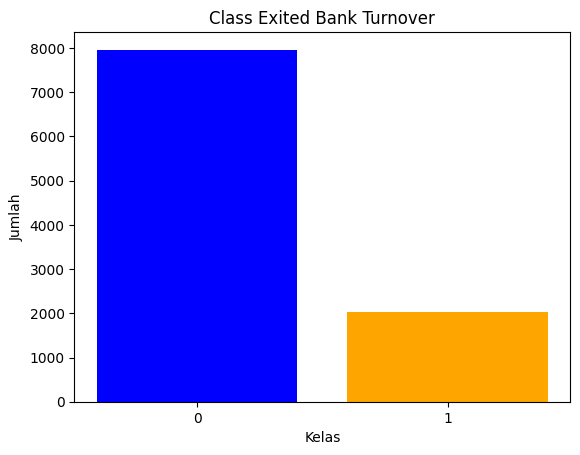

In [102]:
plt.bar(class_counts.index, class_counts.values,color=['blue','orange'])
plt.xticks(class_counts.index)
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.title('Class Exited Bank Turnover')
plt.show()

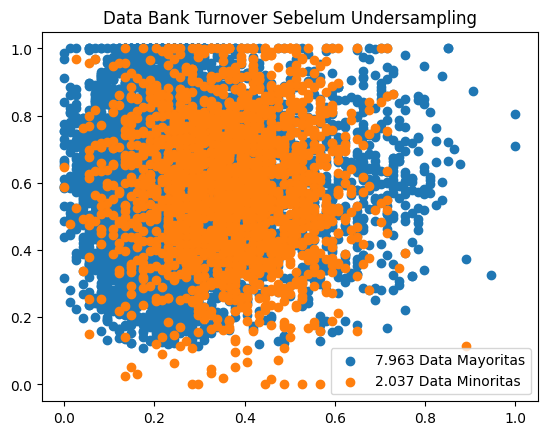

In [8]:
X = df.drop('Exited', axis=1)
y = df['Exited']
plt.scatter(X.loc[y == 0, "Age"], X.loc[y == 0, "CreditScore"], label="7.963 Data Mayoritas")
plt.scatter(X.loc[y == 1, "Age"], X.loc[y == 1, "CreditScore"], label="2.037 Data Minoritas")
plt.title("Data Bank Turnover Sebelum Undersampling")
plt.legend()
plt.show()


In [9]:
import timeit
start = timeit.default_timer()
sum=0
n=1000000
for i in range (n+1):
    sum+=i

from sklearn.utils import resample
df_majority = df[df['Exited']==0]
df_minority = df[df['Exited']==1]
df_majority_undersampled = resample(df_majority, replace=True, n_samples=len(df_minority), random_state=42)
df_undersampled = pd.concat([df_minority, df_majority_undersampled])
#df_undersampled.to_csv("RUSs Data Bank Turnover.csv", index=False)

#Waktu
stop=timeit.default_timer()
lama=stop-start
print("Waktu Eksekusi RUS: ",lama, "detik")

Waktu Eksekusi RUS:  0.1572542999997495 detik


In [10]:
df_undersampled['Exited'].value_counts()

1    2037
0    2037
Name: Exited, dtype: int64

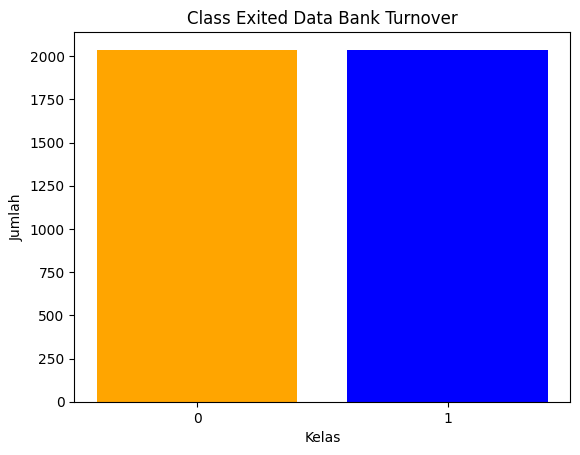

In [106]:
plt.bar(df_undersampled['Exited'].value_counts().index, df_undersampled['Exited'].value_counts().values,color=['blue','orange'])
plt.xticks(df_undersampled['Exited'].value_counts().index)
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.title('Class Exited Data Bank Turnover')
plt.show()

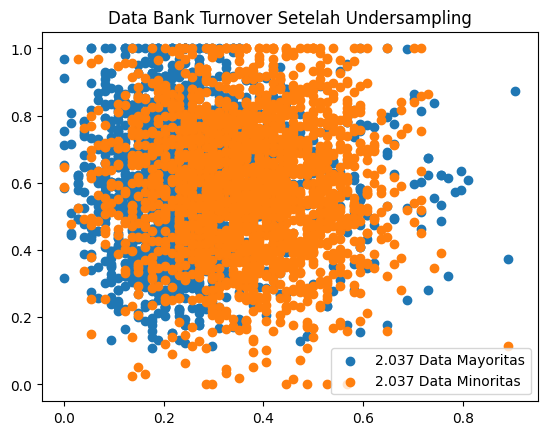

In [11]:
X = df_undersampled.drop('Exited', axis=1)
y = df_undersampled['Exited']
plt.scatter(X.loc[y == 0, "Age"], X.loc[y == 0, "CreditScore"], label="2.037 Data Mayoritas")
plt.scatter(X.loc[y == 1, "Age"], X.loc[y == 1, "CreditScore"], label="2.037 Data Minoritas")
plt.title("Data Bank Turnover Setelah Undersampling")
plt.legend()
plt.show()


In [108]:
df_undersampled

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0
2,0.304,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0
5,0.590,1,0.351351,0.8,0.453394,0.333333,1,0,0.748797,1,0,0,1
7,0.052,0,0.148649,0.4,0.458540,1.000000,1,0,0.596733,1,0,1,0
16,0.606,1,0.540541,0.1,0.528513,0.000000,1,0,0.025433,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7207,0.340,0,0.162162,0.4,0.578813,0.333333,0,0,0.725816,0,0,0,1
4818,0.804,0,0.243243,0.1,0.346108,0.000000,1,1,0.526395,0,1,0,0
7575,0.422,1,0.418919,0.5,0.377659,0.000000,1,1,0.133411,0,0,1,0
9082,0.836,0,0.243243,0.5,0.718098,0.333333,1,0,0.086693,0,1,0,0


In [109]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score,confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.tree import DecisionTreeClassifier
# Decision Tree
Tree_classifier = DecisionTreeClassifier()

# Data Training
Tree_classifier.fit(X_train, y_train)
# Prediksi
y_hat = Tree_classifier.predict(X_test) #y_hat = prediksi

In [110]:
df_train = pd.DataFrame(X_train, columns=df.columns[:-1])
df_train["Outcome"] = y_train
df_train

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Outcome
1235,0.346,1,0.608108,0.6,0.463245,0.000000,1,1,0.597022,NaN,0,1,0
83,0.312,0,0.216216,0.4,0.359937,0.000000,1,1,0.796195,NaN,1,0,0
2748,0.102,1,0.405405,0.8,0.510726,0.000000,1,0,0.878794,NaN,0,1,1
1098,0.880,0,0.108108,0.4,0.564300,0.333333,0,0,0.491535,NaN,1,0,0
6449,0.686,1,0.364865,0.2,0.464518,0.333333,0,0,0.115655,NaN,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5371,0.724,1,0.202703,0.3,0.613076,0.000000,1,0,0.395860,NaN,1,0,1
6255,0.394,1,0.500000,0.4,0.443857,0.666667,1,0,0.084562,NaN,0,1,1
4076,0.644,0,0.432432,0.1,0.000000,0.000000,1,0,0.060482,NaN,1,0,1
8998,0.648,0,0.270270,1.0,0.333712,0.000000,1,0,0.227054,NaN,0,1,0


In [111]:
df_test = pd.DataFrame(X_test, columns=df.columns[:-1])
df_test["Outcome"] = y_test
df_test

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Outcome
8448,0.316,1,0.418919,0.1,0.373926,0.333333,1,1,0.662349,NaN,1,0,1
4023,0.370,1,0.270270,0.8,0.342697,0.000000,1,0,0.046138,NaN,1,0,0
2539,0.468,0,0.378378,0.6,0.348193,0.333333,1,0,0.601884,NaN,0,1,1
2098,0.502,0,0.337838,0.2,0.000000,0.000000,1,0,0.248535,NaN,1,0,1
5743,0.570,1,0.270270,0.0,0.411550,0.000000,0,0,0.791741,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,1.000,1,0.121622,0.1,0.403663,0.333333,1,1,0.131281,NaN,0,1,0
6065,0.682,0,0.256757,0.7,0.490508,0.000000,1,1,0.490801,NaN,0,1,1
5143,0.592,1,0.175676,0.2,0.000000,0.000000,1,1,0.854131,NaN,0,0,1
6376,0.700,1,0.378378,0.5,0.382119,0.000000,1,0,0.491354,NaN,1,0,1


In [112]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72       583
           1       0.75      0.72      0.73       640

    accuracy                           0.73      1223
   macro avg       0.73      0.73      0.73      1223
weighted avg       0.73      0.73      0.73      1223



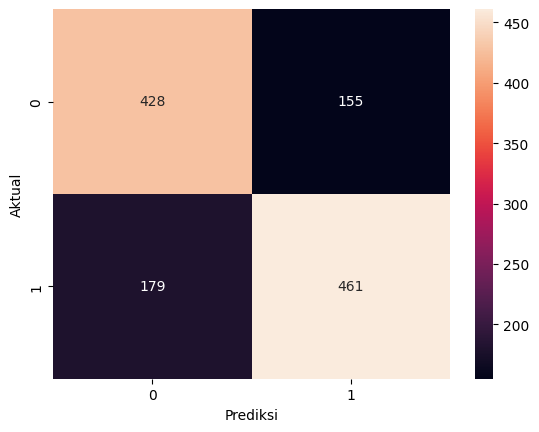

In [113]:
# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_hat)

# Plotting confusion matrix
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

In [114]:
# Hitung akurasi
akurasi = accuracy_score(y_test, y_hat)
print("Akurasi:", akurasi)

# Hitung presisi
presisi = precision_score(y_test, y_hat)
print("Presisi:", presisi)

# Hitung recall
recall = recall_score(y_test, y_hat)
print("Recall:", recall)

# Hitung f-measure
f_measure = f1_score(y_test, y_hat)
print("F-measure:", f_measure)

Akurasi: 0.7269010629599346
Presisi: 0.7483766233766234
Recall: 0.7203125
F-measure: 0.7340764331210191


## **Data Stroke**

In [12]:
# memuat dataset dari file CSV
df = pd.read_csv('C:/Users/LENOVO/OneDrive/Desktop/SEMINAR HASIL/Code TA/Data After Processing/Data Stroke.csv')

# menentukan kelas minoritas dan kelas mayoritas
target_column = 'stroke'
class_counts = df[target_column].value_counts()

if class_counts[0] > class_counts[1]:
    minority_class = 1
    majority_class = 0
else:
    minority_class = 0
    majority_class = 1

print(f'Kelas minoritas: {minority_class}')
print(f'Kelas mayoritas: {majority_class}')


Kelas minoritas: 1
Kelas mayoritas: 0


In [116]:
df

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,0.816895,0,1,1,0.801265,0.301260,1,0,0,1,0,0,0,1,0,1,0,0
1,0,0.743652,0,0,1,0.679023,0.212981,1,0,0,0,1,0,1,0,0,0,1,0
2,1,0.975586,0,1,1,0.234512,0.254296,1,0,0,1,0,0,1,0,0,0,1,0
3,0,0.597168,0,0,1,0.536008,0.276060,1,0,0,1,0,0,0,1,0,0,0,1
4,0,0.963379,1,0,1,0.549349,0.156930,1,0,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,0.975586,1,0,1,0.132167,0.212981,0,0,0,1,0,0,0,1,0,0,1,0
5106,0,0.987793,0,0,1,0.323516,0.340206,0,0,0,0,1,0,0,1,0,0,1,0
5107,0,0.426270,0,0,1,0.128658,0.232532,0,0,0,0,1,0,1,0,0,0,1,0
5108,1,0.621582,0,0,1,0.513203,0.175258,0,0,0,1,0,0,1,0,0,1,0,0


In [117]:
df_fil = df.loc[df["stroke"] == 0]
df_fil

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
249,1,0.035645,0,0,0,0.184655,0.088202,0,0,0,0,0,1,1,0,1,0,0,0
250,1,0.707031,1,0,1,0.151602,0.331042,0,0,0,1,0,0,0,1,0,0,1,0
251,0,0.096680,0,0,0,0.257455,0.083620,0,0,0,1,0,0,0,1,1,0,0,0
252,0,0.853516,0,0,1,0.064260,0.293242,0,0,0,1,0,0,1,0,0,1,0,0
253,1,0.169922,0,0,0,0.490075,0.100802,0,0,1,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,0.975586,1,0,1,0.132167,0.212981,0,0,0,1,0,0,0,1,0,0,1,0
5106,0,0.987793,0,0,1,0.323516,0.340206,0,0,0,0,1,0,0,1,0,0,1,0
5107,0,0.426270,0,0,1,0.128658,0.232532,0,0,0,0,1,0,1,0,0,0,1,0
5108,1,0.621582,0,0,1,0.513203,0.175258,0,0,0,1,0,0,1,0,0,1,0,0


In [118]:
df_fil = df.loc[df["stroke"] == 1]
df_fil

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,0.816895,0,1,1,0.801265,0.301260,1,0,0,1,0,0,0,1,0,1,0,0
1,0,0.743652,0,0,1,0.679023,0.212981,1,0,0,0,1,0,1,0,0,0,1,0
2,1,0.975586,0,1,1,0.234512,0.254296,1,0,0,1,0,0,1,0,0,0,1,0
3,0,0.597168,0,0,1,0.536008,0.276060,1,0,0,1,0,0,0,1,0,0,0,1
4,0,0.963379,1,0,1,0.549349,0.156930,1,0,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,1,0.694824,0,0,1,0.137753,0.302405,1,0,0,1,0,0,1,0,1,0,0,0
245,0,0.169922,0,0,0,0.012972,0.235968,1,0,0,0,0,1,1,0,1,0,0,0
246,0,0.914551,0,0,1,0.109316,0.217640,1,0,0,0,1,0,1,0,0,1,0,0
247,1,0.865723,1,0,1,0.150863,0.212981,1,0,0,0,1,0,1,0,1,0,0,0


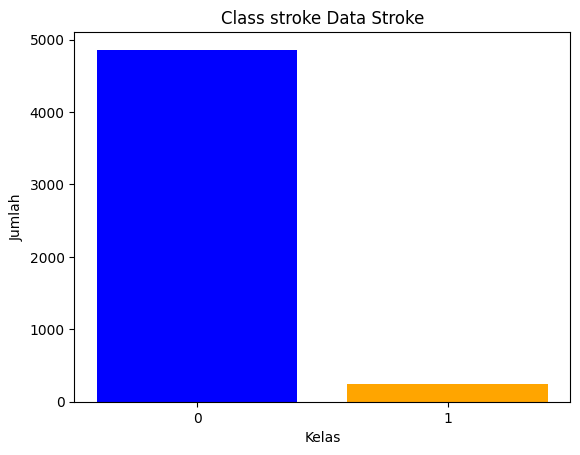

In [119]:
plt.bar(class_counts.index, class_counts.values,color=['blue','orange'])
plt.xticks(class_counts.index)
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.title('Class stroke Data Stroke')
plt.show()

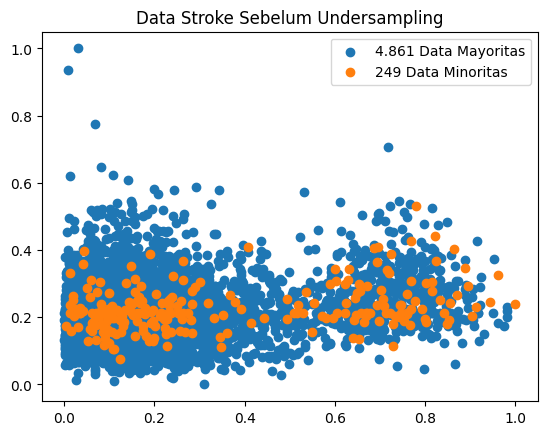

In [13]:
X = df.drop('stroke', axis=1)
y = df['stroke']
plt.scatter(X.loc[y == 0, "avg_glucose_level"], X.loc[y == 0, "bmi"], label="4.861 Data Mayoritas")
plt.scatter(X.loc[y == 1, "avg_glucose_level"], X.loc[y == 1, "bmi"], label="249 Data Minoritas")
plt.title("Data Stroke Sebelum Undersampling")
plt.legend()
plt.show()


In [14]:
import timeit
start = timeit.default_timer()
sum=0
n=1000000
for i in range (n+1):
    sum+=i

from sklearn.utils import resample
df_majority = df[df['stroke']==0]
df_minority = df[df['stroke']==1]
df_majority_undersampled = resample(df_majority, replace=True, n_samples=len(df_minority), random_state=42)
df_undersampled = pd.concat([df_minority, df_majority_undersampled])
#df_undersampled.to_csv("RUSs Data Bank Turnover.csv", index=False)

#Waktu
stop=timeit.default_timer()
lama=stop-start
print("Waktu Eksekusi RUS: ",lama, "detik")

Waktu Eksekusi RUS:  0.09033140000019557 detik


In [15]:
df_undersampled['stroke'].value_counts()

1    249
0    249
Name: stroke, dtype: int64

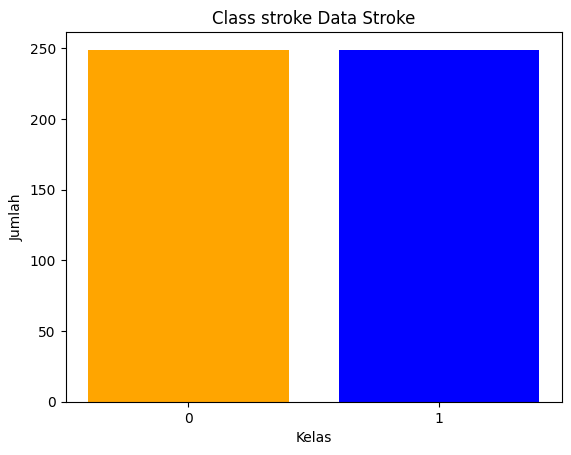

In [123]:
plt.bar(df_undersampled['stroke'].value_counts().index, df_undersampled['stroke'].value_counts().values,color=['blue','orange'])
plt.xticks(df_undersampled['stroke'].value_counts().index)
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.title('Class stroke Data Stroke')
plt.show()

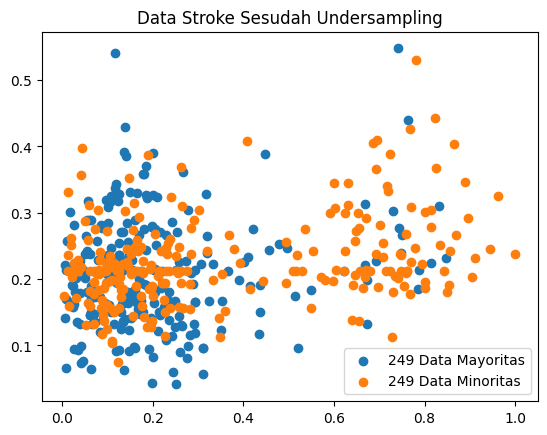

In [16]:
X = df_undersampled.drop('stroke', axis=1)
y = df_undersampled['stroke']
plt.scatter(X.loc[y == 0, "avg_glucose_level"], X.loc[y == 0, "bmi"], label="249 Data Mayoritas")
plt.scatter(X.loc[y == 1, "avg_glucose_level"], X.loc[y == 1, "bmi"], label="249 Data Minoritas")
plt.title("Data Stroke Sesudah Undersampling")
plt.legend()
plt.show()


In [125]:
df_undersampled

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,0.816895,0,1,1,0.801265,0.301260,1,0,0,1,0,0,0,1,0,1,0,0
1,0,0.743652,0,0,1,0.679023,0.212981,1,0,0,0,1,0,1,0,0,0,1,0
2,1,0.975586,0,1,1,0.234512,0.254296,1,0,0,1,0,0,1,0,0,0,1,0
3,0,0.597168,0,0,1,0.536008,0.276060,1,0,0,1,0,0,0,1,0,0,0,1
4,0,0.963379,1,0,1,0.549349,0.156930,1,0,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4742,1,0.584961,0,0,1,0.199058,0.278351,0,0,0,1,0,0,1,0,0,0,1,0
1549,1,0.792480,0,0,1,0.017311,0.301260,0,0,0,1,0,0,0,1,0,0,1,0
4236,0,0.377441,0,0,1,0.352230,0.167239,0,0,0,1,0,0,0,1,0,0,0,1
1776,0,0.951172,1,0,1,0.168544,0.265750,0,0,0,1,0,0,1,0,0,0,0,1


In [126]:
X = df_undersampled.drop('stroke', axis=1)
y = df_undersampled['stroke']

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score,confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.tree import DecisionTreeClassifier
# Decision Tree
Tree_classifier = DecisionTreeClassifier()

# Data Training
Tree_classifier.fit(X_train, y_train)
# Prediksi
y_hat = Tree_classifier.predict(X_test) #y_hat = prediksi

In [127]:
df_train = pd.DataFrame(X_train, columns=df.columns[:-1])
df_train["Outcome"] = y_train
df_train

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,Outcome
3972,1,0.182129,0,0,0,0.042332,0.073310,NaN,0,1,0,0,0,0,1,1,0,0,0
1119,1,0.645996,0,0,1,0.145924,0.180985,NaN,0,0,1,0,0,0,1,1,0,0,0
3,0,0.597168,0,0,1,0.536008,0.276060,NaN,0,0,1,0,0,0,1,0,0,0,1
3553,1,0.877930,0,1,1,0.141723,0.168385,NaN,0,0,0,1,0,0,1,0,1,0,0
958,1,0.365234,0,0,1,0.228511,0.265750,NaN,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0,0.609375,1,0,1,0.083372,0.229095,NaN,0,0,1,0,0,1,0,0,1,0,1
2807,0,0.499512,0,0,1,0.236497,0.180985,NaN,1,0,0,0,0,1,0,0,0,1,0
3022,1,0.365234,0,0,1,0.120626,0.194731,NaN,0,0,1,0,0,0,1,0,0,0,0
2760,0,0.291992,0,0,0,0.084803,0.151203,NaN,0,0,1,0,0,0,1,0,0,1,0


In [128]:
df_test = pd.DataFrame(X_test, columns=df.columns[:-1])
df_test["Outcome"] = y_test
df_test

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,Outcome
3118,0,0.377441,0,0,1,0.152710,0.142039,NaN,1,0,0,0,0,0,1,0,0,1,0
73,1,0.768066,0,0,1,0.800665,0.195876,NaN,0,0,1,0,0,1,0,0,0,1,1
231,0,0.963379,0,0,1,0.196704,0.128293,NaN,0,0,1,0,0,0,1,0,0,0,1
175,1,0.877930,1,0,1,0.601837,0.306987,NaN,0,0,0,1,0,1,0,0,0,1,1
237,1,0.938965,0,0,1,0.494045,0.255441,NaN,0,0,0,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,1,0.829102,1,1,1,1.000000,0.238259,NaN,0,0,1,0,0,1,0,0,0,0,1
5,1,0.987793,0,0,1,0.605161,0.214204,NaN,0,0,1,0,0,0,1,0,1,0,1
116,1,0.743652,1,0,1,0.096898,0.194731,NaN,0,0,0,1,0,1,0,0,0,0,1
45,1,0.926758,1,0,1,0.870003,0.266896,NaN,0,0,1,0,0,1,0,0,0,1,1


In [129]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.66      0.68      0.67        72
           1       0.70      0.68      0.69        78

    accuracy                           0.68       150
   macro avg       0.68      0.68      0.68       150
weighted avg       0.68      0.68      0.68       150



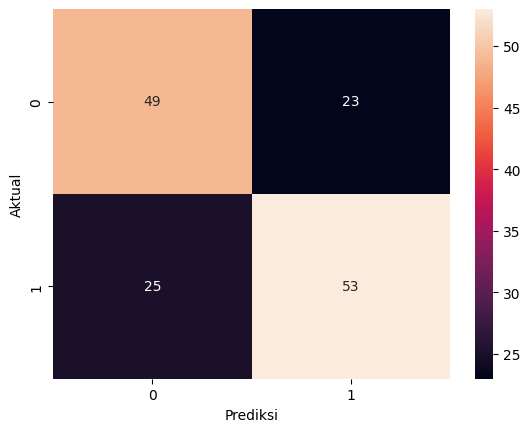

In [130]:
# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_hat)

# Plotting confusion matrix
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

In [131]:
# Hitung akurasi
akurasi = accuracy_score(y_test, y_hat)
print("Akurasi:", akurasi)

# Hitung presisi
presisi = precision_score(y_test, y_hat)
print("Presisi:", presisi)

# Hitung recall
recall = recall_score(y_test, y_hat)
print("Recall:", recall)

# Hitung f-measure
f_measure = f1_score(y_test, y_hat)
print("F-measure:", f_measure)

Akurasi: 0.68
Presisi: 0.6973684210526315
Recall: 0.6794871794871795
F-measure: 0.6883116883116882


## **Data Credit Card**

In [17]:
# memuat dataset dari file CSV
df = pd.read_csv('C:/Users/LENOVO/OneDrive/Desktop/SEMINAR HASIL/Code TA/Data After Processing/Data Credit Card.csv')

# menentukan kelas minoritas dan kelas mayoritas
target_column = 'Class'
class_counts = df[target_column].value_counts()

if class_counts[0] > class_counts[1]:
    minority_class = 1
    majority_class = 0
else:
    minority_class = 0
    majority_class = 1

print(f'Kelas minoritas: {minority_class}')
print(f'Kelas mayoritas: {majority_class}')


Kelas minoritas: 1
Kelas mayoritas: 0


In [133]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [134]:
df_fil = df.loc[df["Class"] == 0]
df_fil

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [135]:
df_fil = df.loc[df["Class"] == 1]
df_fil

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


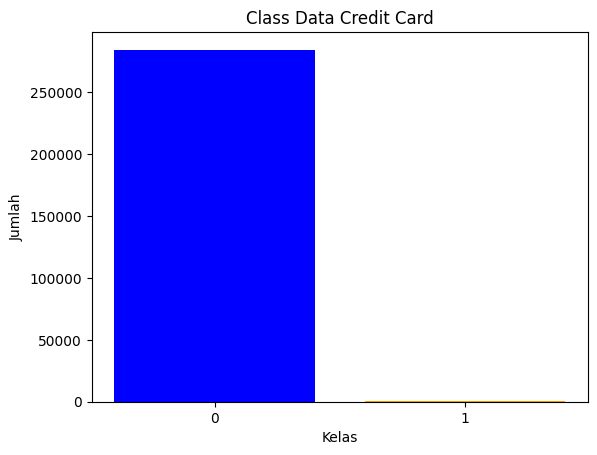

In [136]:
plt.bar(class_counts.index, class_counts.values,color=['blue','orange'])
plt.xticks(class_counts.index)
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.title('Class Data Credit Card')
plt.show()

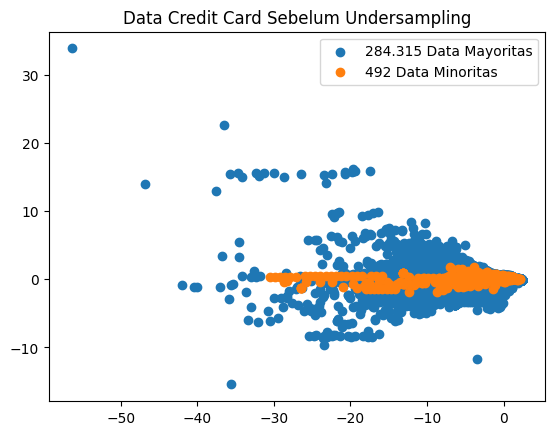

In [28]:
X = df.drop('Class', axis=1)
y = df['Class']
plt.scatter(X.loc[y == 0, "V1"], X.loc[y == 0, "V28"], label="284.315 Data Mayoritas")
plt.scatter(X.loc[y == 1, "V1"], X.loc[y == 1, "V28"], label="492 Data Minoritas")
plt.title("Data Credit Card Sebelum Undersampling")
plt.legend()
plt.show()


In [19]:
import timeit
start = timeit.default_timer()
sum=0
n=1000000
for i in range (n+1):
    sum+=i

from sklearn.utils import resample
df_majority = df[df['Class']==0]
df_minority = df[df['Class']==1]
df_majority_undersampled = resample(df_majority, replace=True, n_samples=len(df_minority), random_state=42)
df_undersampled = pd.concat([df_minority, df_majority_undersampled])
#df_undersampled.to_csv("RUSs Data Credit Card.csv", index=False)

#Waktu
stop=timeit.default_timer()
lama=stop-start
print("Waktu Eksekusi RUS: ",lama, "detik")

Waktu Eksekusi RUS:  0.21293240000022706 detik


In [20]:
df_undersampled['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

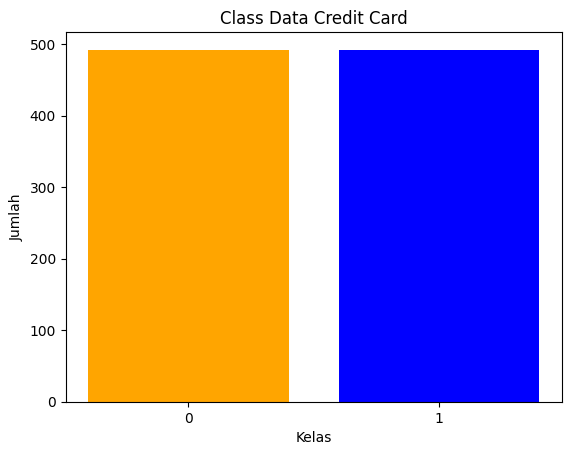

In [140]:
plt.bar(df_undersampled['Class'].value_counts().index, df_undersampled['Class'].value_counts().values,color=['blue','orange'])
plt.xticks(df_undersampled['Class'].value_counts().index)
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.title('Class Data Credit Card')
plt.show()

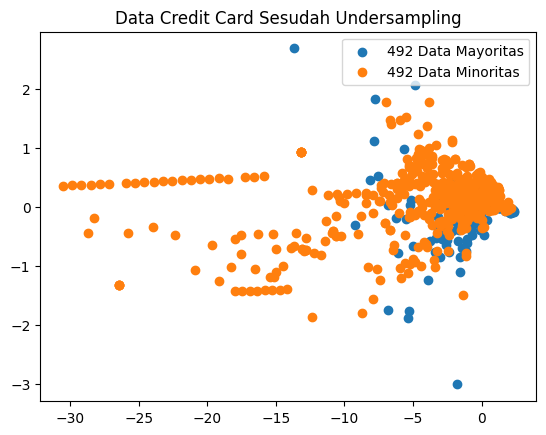

In [29]:
X = df_undersampled.drop('Class', axis=1)
y = df_undersampled['Class']
plt.scatter(X.loc[y == 0, "V1"], X.loc[y == 0, "V28"], label="492 Data Mayoritas")
plt.scatter(X.loc[y == 1, "V1"], X.loc[y == 1, "V28"], label="492 Data Minoritas")
plt.title("Data Credit Card Sesudah Undersampling")
plt.legend()
plt.show()


In [142]:
y.value_counts()

1    492
0    492
Name: Class, dtype: int64

In [143]:
df_undersampled

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273800,2.341158,-1.140193,-1.431234,-1.446218,-0.959278,-1.328559,-0.580484,-0.525896,-1.617138,1.624248,...,0.204313,1.250873,-0.096074,0.132532,0.408741,0.286812,-0.011742,-0.067825,13.99,0
9384,-0.300059,0.364418,1.611098,-1.056658,0.652460,0.112808,0.338364,-0.154589,1.126379,-0.768134,...,-0.051844,0.166848,-0.294988,-0.818076,0.005634,0.907665,-0.267201,-0.249516,20.33,0
38205,0.813744,-0.617420,1.782595,1.696710,-1.515473,0.350754,-0.893978,0.316722,1.186037,-0.280778,...,0.305272,0.919456,-0.114790,0.653273,0.272301,-0.189475,0.091363,0.064843,125.53,0
74642,-1.833329,0.046103,2.151713,-0.431903,-0.762017,-0.388451,-0.215207,0.714157,-0.162439,-0.942656,...,0.310683,0.559447,-0.071901,0.598248,0.370825,0.617409,0.112006,-0.033303,101.16,0


In [144]:
X = df_undersampled.drop('Class', axis=1)
y = df_undersampled['Class']

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score,confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.tree import DecisionTreeClassifier
# Decision Tree
Tree_classifier = DecisionTreeClassifier()

# Data Training
Tree_classifier.fit(X_train, y_train)
# Prediksi
y_hat = Tree_classifier.predict(X_test) #y_hat = prediksi

In [145]:
df_train = pd.DataFrame(X_train, columns=df.columns[:-1])
df_train["Outcome"] = y_train
df_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Outcome
214662,0.467992,1.100118,-5.607145,2.204714,-0.578539,-0.174200,-3.454201,1.102823,-1.065016,-5.416037,...,0.983481,0.899876,-0.285103,-1.929717,0.319869,0.170636,0.851798,0.372098,120.54,1
130242,1.081374,-0.173686,-0.125075,1.574406,1.677616,4.428573,-1.069906,1.151166,-0.026695,0.530029,...,-0.108454,-0.426971,-0.035571,0.994900,0.437947,-0.033462,0.035461,0.037910,51.93,0
88128,-0.376680,0.423100,2.259825,-0.028972,-0.703751,0.027954,-0.105448,0.228011,0.317381,-0.557323,...,0.274027,0.727819,-0.175753,-0.099335,-0.202768,0.465154,0.058439,0.067656,35.04,0
87704,1.003516,-0.106760,0.038599,1.024925,-0.225310,-0.430090,0.214420,-0.056745,-0.166481,0.150887,...,0.119085,0.063632,-0.244484,0.003149,0.636667,-0.335456,-0.016457,0.025295,118.50,0
237107,1.184891,3.152084,-6.134780,5.531252,1.733867,-1.816861,-0.916696,0.265568,-3.158014,-3.890169,...,0.124236,-0.823865,-0.079887,0.028828,0.389711,0.060171,0.485187,0.326552,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41395,-4.446847,-0.014793,-5.126307,6.945130,5.269255,-4.297177,-2.591242,0.342671,-3.880663,-3.976525,...,0.247913,-0.049586,-0.226017,-0.401236,0.856124,0.661272,0.492560,0.971834,1.00,1
142557,-1.430864,-0.802529,1.123320,0.389760,-0.281214,-0.055123,1.326232,0.195700,-0.546890,-0.713474,...,0.325575,0.014002,0.844946,0.114963,0.156365,-0.619437,-0.120351,0.035594,354.33,1
176977,-0.749282,-1.061597,0.470639,-0.408566,-1.674363,0.284504,1.851500,-0.105981,0.669334,-1.328033,...,0.549622,0.887129,1.049421,-0.043063,-0.244144,0.038978,-0.081202,0.088155,500.00,0
239499,-2.150855,2.187917,-3.430516,0.119476,-0.173210,0.290700,-2.808988,-2.679351,-0.556685,-4.485483,...,-0.073205,0.561496,-0.075034,-0.437619,0.353841,-0.521339,0.144465,0.026588,50.00,1


In [146]:

df_test = pd.DataFrame(X_test, columns=df.columns[:-1])
df_test["Outcome"] = y_test
df_test

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Outcome
107295,-1.974299,-1.520596,1.684337,-2.243626,-0.805434,-0.516547,-1.348294,0.817467,-2.410096,0.747594,...,0.197719,0.287322,-0.059603,-0.015477,0.322103,-0.166627,0.190786,-0.131560,79.00,0
248296,-0.613696,3.698772,-5.534941,5.620486,1.649263,-2.335145,-0.907188,0.706362,-3.747646,-4.230984,...,0.319261,-0.471379,-0.075890,-0.667909,-0.642848,0.070600,0.488410,0.292345,0.00,1
2871,-0.555349,1.128839,0.456781,-0.556073,1.096594,0.772095,0.480359,0.328515,-0.361465,-0.077320,...,-0.326456,-0.796556,-0.196585,-1.762968,0.023592,0.195661,0.360789,0.134492,5.85,0
239501,-6.682832,-2.714268,-5.774530,1.449792,-0.661836,-1.148650,0.849686,0.433427,-1.315646,-2.796332,...,0.220526,1.187013,0.335821,0.215683,0.803110,0.044033,-0.054988,0.082337,237.26,1
143336,-6.713407,3.921104,-9.746678,5.148263,-5.151563,-2.099389,-5.937767,3.578780,-4.684952,-8.537758,...,0.954272,-0.451086,0.127214,-0.339450,0.394096,1.075295,1.649906,-0.394905,252.92,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124278,-5.129937,5.175102,-3.134030,1.116648,-1.694747,2.070258,-7.153496,-10.700534,-2.534032,-3.663266,...,-5.912426,2.246010,1.010550,-0.567496,-0.610164,-0.410800,-0.915947,0.122155,1.00,0
11583,1.413851,-0.571332,0.285630,-0.560176,-0.625381,0.029696,-0.821906,0.001137,0.767398,0.315009,...,-0.186685,-0.270310,-0.130412,-0.579424,0.591721,-0.244295,-0.023304,-0.013810,10.00,0
151009,-26.457745,16.497472,-30.177317,8.904157,-17.892600,-1.227904,-31.197329,-11.438920,-9.462573,-22.187089,...,-8.755698,3.460893,0.896538,0.254836,-0.738097,-0.966564,-7.263482,-1.324884,1.00,1
77563,-2.143482,-0.301802,1.977592,-1.142138,-0.905708,1.300764,1.121450,-0.955081,1.208414,-0.122256,...,0.213632,-0.458598,0.243295,-0.248498,0.293626,0.878817,0.277567,-0.414392,273.98,0


In [147]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       146
           1       0.90      0.92      0.91       150

    accuracy                           0.91       296
   macro avg       0.91      0.91      0.91       296
weighted avg       0.91      0.91      0.91       296



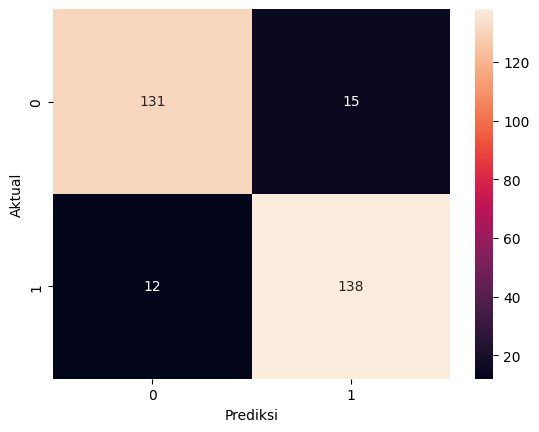

In [148]:
# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_hat)

# Plotting confusion matrix
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

In [149]:
# Hitung akurasi
akurasi = accuracy_score(y_test, y_hat)
print("Akurasi:", akurasi)

# Hitung presisi
presisi = precision_score(y_test, y_hat)
print("Presisi:", presisi)

# Hitung recall
recall = recall_score(y_test, y_hat)
print("Recall:", recall)

# Hitung f-measure
f_measure = f1_score(y_test, y_hat)
print("F-measure:", f_measure)

Akurasi: 0.9087837837837838
Presisi: 0.9019607843137255
Recall: 0.92
F-measure: 0.9108910891089109
